## Examples of CubeSphere object functionalities and user-interface

In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# The new package we are going to make. See cubesphere.py
import cubesphere as cs

Open the output from the online GFDL-FV3 model. We can get the grid information from atmos_static.tile*.nc. For GCHP, however, we need to calculate the grid information on-the-fly.

In [2]:
ds = cs.open_FV3data("sample_data/","atmos_daily",verbose=True) 

opening atmos_daily.tile1.nc, opening atmos_static.tile1.nc
opening atmos_daily.tile2.nc, opening atmos_static.tile2.nc
opening atmos_daily.tile3.nc, opening atmos_static.tile3.nc
opening atmos_daily.tile4.nc, opening atmos_static.tile4.nc
opening atmos_daily.tile5.nc, opening atmos_static.tile5.nc
opening atmos_daily.tile6.nc, opening atmos_static.tile6.nc


A cubesphere object is just a xarray dataset of the shape (tile,[other dimensions],y,x):

In [3]:
ds

<xarray.Dataset>
Dimensions:  (pfull: 20, phalf: 21, tile: 6, time: 8, x: 48, x_b: 49, y: 48, y_b: 49)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * time     (time) float64 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0
  * pfull    (pfull) float64 7.673 47.07 100.7 152.7 204.4 255.8 307.2 358.6 ...
  * phalf    (phalf) float64 1.0 26.0 77.26 128.5 179.8 231.1 282.3 333.6 ...
  * x_b      (x_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * y_b      (y_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
    lon      (tile, y, x) float32 305.783 307.37 308.986 310.631 312.306 ...
    lat      (tile, y, x) float32 -34.8911 -35.5988 -36.2858 -36.951 ...
    lon_b    (tile, y_b, x_b) float32 305.0 306.573 308.174 309.805 311.465 ...
    lat_b    (tile, y_b, x_b) float32 -35.2644 -35.9889 -36.6926 -37.3743 ...
Dimensions without coordinates: tile

There are two major ways to extend xarray functionalities: "subclasses" and "accessors". Subclasses seem to be discouraged so we use accessors to attach new methods to xarray objects.

See http://xarray.pydata.org/en/stable/internals.html#extending-xarray

In [4]:
#Make sure this object contains enough cube-sphere information. 
#If false, other methods (below) will fail
ds.cs.isCS

True

Since this object contains enough grid information, we can write new plotting methods that can be called just like normal xarray functions.

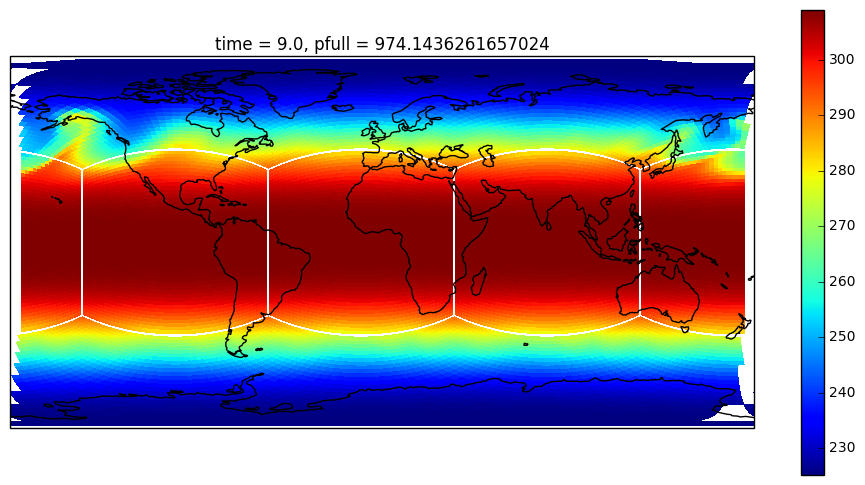

In [5]:
plt.figure(figsize=(12,6));
ds["temp"].isel(time=0,pfull=-1).cs.plot_CSlayer()

plot_CSlayer() is currently written in a very naive way so it looks quite sloppy...

Another annoying thing is that cell boundaries ("lon_b" and "lat_b") are automatically dropped when we extract a dataarray from the dataset. There are many ways to pass the boundaries to the plotting routine -- just a matter of how elegant the solution is.

In [6]:
ds["temp"].coords

Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * time     (time) float64 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0
  * pfull    (pfull) float64 7.673 47.07 100.7 152.7 204.4 255.8 307.2 358.6 ...
    lon      (tile, y, x) float32 305.783 307.37 308.986 310.631 312.306 ...
    lat      (tile, y, x) float32 -34.8911 -35.5988 -36.2858 -36.951 ...

We can also take average over physical dimensions (lat or lon) using xarray's built-in multidimensional-groupby.
See http://xarray.pydata.org/en/stable/groupby.html#multidimensional-grouping

Such binning is by no means conservative, but serves as a quick way for showing the zonal mean.

Frozen(OrderedDict([('time', 8), ('pfull', 20), ('lat_bins', 45)]))


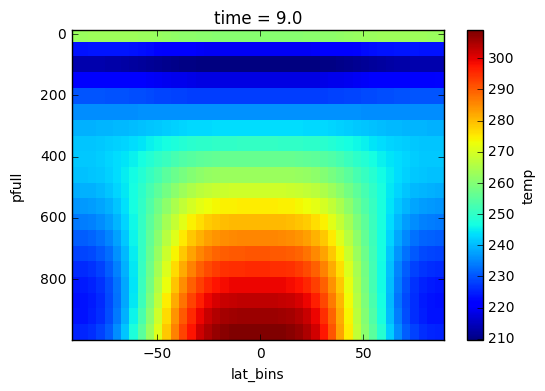

In [7]:
zonal_mean = ds["temp"].cs.zonal_mean()
print(zonal_mean.sizes) # It is binned with the default 5 degree interval.

zonal_mean.isel(time=0).plot.pcolormesh(cmap="jet",yincrease=False)

Same for the meridional mean, although not too useful.

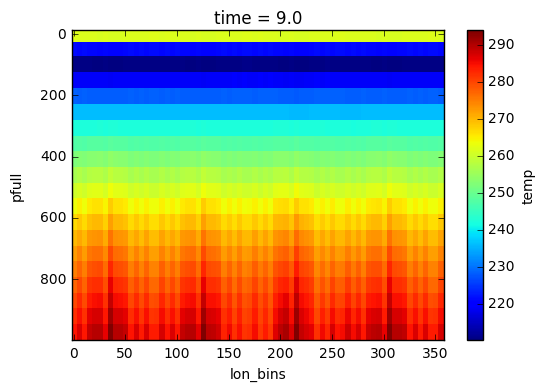

In [8]:
ds["temp"].isel(time=0).cs.meridional_mean().plot.pcolormesh(cmap="jet",yincrease=False)